In [3]:
import numpy as np
import scipy as sp
import pandas as pd
from decimal import Decimal
import time
from copy import copy
import matplotlib.pyplot as plt

In [4]:
def yukawas(Hb,vb,Hd,HY,vY,phi1,theta1,phi2,theta2,Lambda_0):
    
    
    U12 = -1./2. * np.abs((np.dot(np.dot(((vb+vY).T),(np.linalg.inv(Hb-Hd+HY))),(vb+vY))+\
        np.dot(np.dot(((-vb-4.*vY).T),(np.linalg.inv(-Hb-Hd-4.*HY))),(-vb-4.*vY))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hb+3.*HY))),(3.*vY))))

    U13 = -1./2. * np.abs((np.dot(np.dot(((vb+vY).T),(np.linalg.inv(Hb-Hd+HY))),(vb+vY))+\
        np.dot(np.dot(((-vb+3.*vY).T),(np.linalg.inv(-Hb+2.*Hd+3.*HY))),(-vb+3.*vY))+\
        np.dot(np.dot(((-4.*vY).T),(np.linalg.inv(-Hd-4.*HY))),(-4.*vY))))
    
    U21 = -1./2. * np.abs((np.dot(np.dot(((vb-4.*vY).T),(np.linalg.inv(Hb-Hd-4.*HY))),(vb-4.*vY))+\
        np.dot(np.dot(((-vb+vY).T),(np.linalg.inv(-Hb-Hd+HY))),(-vb+vY))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hd+3.*HY))),(3.*vY))))
    
    U23 = -1./2. * np.abs((np.dot(np.dot(((vb+3.*vY).T),(np.linalg.inv(Hb+2.*Hd+3.*HY))),(vb+3.*vY))+\
        np.dot(np.dot(((-vb-4.*vY).T),(np.linalg.inv(-Hb-Hd-4.*HY))),(-vb-4.*vY))+\
        np.dot(np.dot(((-vb+vY).T),(np.linalg.inv(-Hb-Hd+HY))),(-vb+vY))))

    U31 = -1./2. * np.abs((np.dot(np.dot(((vb-4.*vY).T),(np.linalg.inv(Hb-Hd-4.*HY))),(vb-4.*vY))+\
        np.dot(np.dot(((-vb+3.*vY).T),(np.linalg.inv(-Hb+2.*Hd+3.*HY))),(-vb+3.*vY))+\
        np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd+HY))),(vY))))
    
    U32 = -1./2. * np.abs((np.dot(np.dot(((vb+3.*vY).T),(np.linalg.inv(Hb+2.*Hd+3.*vY))),(vb+3.*vY))+\
        np.dot(np.dot(((-vb-4.*vY).T),(np.linalg.inv(-Hb-Hd-4.*HY))),(-vb-4.*vY))+\
        np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd+HY))),(vY))))
    
    U33 = -1./2. * np.abs((np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd+HY))),(vY))+\
        np.dot(np.dot(((-4.*vY).T),(np.linalg.inv(-Hd-4.*HY))),(-4.*vY))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hd+3.*HY))),(3.*vY))))
    
    
    
    D12 = -1./2. * np.abs((np.dot(np.dot(((vb+vY).T),(np.linalg.inv(Hb-Hd+HY))),(vb+vY))+\
        np.dot(np.dot(((-vb+2.*vY).T),(np.linalg.inv(-Hb-3.*Hd+2.*HY))),(-vb+2.*vY))+\
        np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(-2.*Hd-3.*HY))),(-3.*vY))))
    
    D13 = -1./2. * np.abs((np.dot(np.dot(((vb+vY).T),(np.linalg.inv(Hb-Hd+HY))),(vb+vY))+\
        np.dot(np.dot(((-vb-3.*vY).T),(np.linalg.inv(-Hb+2.*Hd-3.*HY))),(-vb-3.*vY))+\
        np.dot(np.dot(((2.*vY).T),(np.linalg.inv(3.*Hd+2.*HY))),(2.*vY))))
    
    D21 = -1./2. * np.abs((np.dot(np.dot(((vb+2.*vY).T),(np.linalg.inv(Hb+3.*Hd+2.*HY))),(vb+2.*vY))+\
        np.dot(np.dot(((-vb+vY).T),(np.linalg.inv(-Hb-Hd+HY))),(-vb+vY))+\
        np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(-2.*Hd-3.*HY))),(-3.*vY))))
    
    D23 = -1./2. * np.abs((np.dot(np.dot(((vb-3.*vY).T),(np.linalg.inv(Hb-2.*Hd-3.*HY))),(vb-3.*vY))+\
        np.dot(np.dot(((-vb+vY).T),(np.linalg.inv(-Hb-Hd+vY))),(-vb+vY))+\
        np.dot(np.dot(((2.*vY).T),(np.linalg.inv(3.*Hd+2.*HY))),(2.*vY))))

    D31 = -1./2. * np.abs((np.dot(np.dot(((vb+2.*vY).T),(np.linalg.inv(Hb+3.*Hd+2.*HY))),(vb+2.*vY))+\
        np.dot(np.dot(((-vb-3.*vY).T),(np.linalg.inv(-Hb-2.*Hd-3.*HY))),(-vb-3.*vY))+\
        np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd+HY))),(vY))))
                          
    D32 = -1./2. * np.abs((np.dot(np.dot(((vb-3.*vY).T),(np.linalg.inv(Hb-2.*Hd-3.*HY))),(vb-3.*vY))+\
        np.dot(np.dot(((-vb+2.*vY).T),(np.linalg.inv(-Hb+3.*Hd+2.*HY))),(-vb+2.*vY))+\
        np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd-HY))),(vY))))
    
    D33 = -1./2. * np.abs((np.dot(np.dot(((vY).T),(np.linalg.inv(-Hd+HY))),(vY))+\
        np.dot(np.dot(((2.*vY).T),(np.linalg.inv(3.*Hd+2.*HY))),(2.*vY))+\
        np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(-2.*Hd-3.*HY))),(-3.*vY))))
                          
                          
    
    E12 = -1./2. * np.abs((np.dot(np.dot(((vb-3.*vY).T),(np.linalg.inv(Hb+3.*Hd-3.*HY))),(vb-3.*vY))+\
        np.dot(np.dot(((-vb).T),(np.linalg.inv(-Hb-Hd))),(-vb))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hd+3.*HY))),(3.*vY))))
    
    E13 = -1./2. * np.abs((np.dot(np.dot(((vb-3.*vY).T),(np.linalg.inv(Hb+3.*Hd-3.*HY))),(vb-3.*vY))+\
        np.dot(np.dot(((-vb+3.*vY).T),(np.linalg.inv(-Hb-2.*Hd+3.*HY))),(-vb+3.*vY))))
    
    E21 = -1./2. * np.abs((np.dot(np.dot((vb.T),(np.linalg.inv(Hb-Hd))),(vb))+\
        np.dot(np.dot(((-vb-3.*vY).T),(np.linalg.inv(-Hb+3.*Hd-3.*HY))),(-vb-3.*vY))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hd+3.*HY))),(3.*vY))))
    
    E23 = -1./2. * np.abs((np.dot(np.dot(((vb+3.*vY).T),(np.linalg.inv(Hb-2.*Hd+3.*HY))),(vb+3.*vY))+\
        np.dot(np.dot(((-vb-3.*vY).T),(np.linalg.inv(-Hb-3.*Hd-3.*HY))),(-vb-3.*vY))))
                          
    E31 = -1./2. * np.abs((np.dot(np.dot(((vb-4.*vY).T),(np.linalg.inv(Hb-Hd-4.*HY))),(vb-4.*vY))+\
        np.dot(np.dot(((-vb+3.*vY).T),(np.linalg.inv(-Hb-2.*Hd+3.*HY))),(-vb+3.*vY))+\
        np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(3.*Hd-3.*HY))),(-3.*vY))))
                          
    E32 = -1./2. * np.abs((np.dot(np.dot(((vb+3.*vY).T),(np.linalg.inv(Hb+2.*Hd+3.*HY))),(vb+3.*vY))+\
        np.dot(np.dot((-vb.T),(np.linalg.inv(-Hb-Hd))),(-vb))+\
        np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(3.*Hd-3.*HY))),(-3.*vY))))
                          
    E33 = 1./2. * np.abs((np.dot(np.dot(((-3.*vY).T),(np.linalg.inv(3.*Hd-3.*HY))),(-3.*vY))+\
        np.dot(np.dot(((3.*vY).T),(np.linalg.inv(2.*Hd+3.*HY))),(3.*vY))))
    
    Yu = np.array([[0,np.cos(theta1)*np.exp(U12),np.sin(phi1)*np.sin(theta1)*np.exp(U13)]\
    ,[np.cos(theta1)*np.exp(U21),0,np.cos(phi1)*np.sin(theta1)*np.exp(U23)]\
    ,[np.sin(phi1)*np.sin(theta1)*np.exp(U31),np.cos(phi1)*np.sin(theta1)*np.exp(U32),np.cos(theta1)*np.exp(U33)]])
    
    Yd = np.array([[0,np.cos(theta2)*np.exp(D12),np.sin(phi2)*np.sin(theta2)*np.exp(D13)]\
    ,[np.cos(theta2)*np.exp(D21),0,np.cos(phi2)*np.sin(theta2)*np.exp(D23)]\
    ,[np.sin(phi2)*np.sin(theta2)*np.exp(D31),np.cos(phi2)*np.sin(theta2)*np.exp(D32),np.cos(theta2)*np.exp(D33)]])
    
    Ye = np.array([[0,np.cos(theta2)*np.exp(E12),np.sin(phi2)*np.sin(theta2)*np.exp(E13)]\
    ,[np.cos(theta2)*np.exp(E21),0,np.cos(phi2)*np.sin(theta2)*np.exp(E23)]\
    ,[np.sin(phi2)*np.sin(theta2)*np.exp(E31),np.cos(phi2)*np.sin(theta2)*np.exp(E32),np.cos(theta2)*np.exp(E33)]])
    
    uU, sU, vhU = np.linalg.svd(Lambda_0*Yu)
    uD, sD, vhD = np.linalg.svd(Lambda_0*Yd)
    uE, sE, vhE = np.linalg.svd(Lambda_0*Ye)
    
    return sU,sD,sE

def yukawaData():
    YuMgut = 2.54*(10**-6)
    YcMgut = 1.37*(10**-3)
    YtMgut = 0.428
    
    dataU = np.array([YtMgut,YcMgut,YuMgut])
    
    YdMgut = 6.56*(10**-5)
    YsMgut = 1.24*(10**-4)
    YbMgut = 0.57*(10**-2)
    
    dataD = np.array([YbMgut,YsMgut,YdMgut])
    
    YeMgut  = 2.70341*(10**-6)
    YmuMgut = 5.70705*(10**-4)
    YtaMgut = 0.97020*(10**-2)

    dataE = np.array([YtaMgut,YmuMgut,YeMgut])
    
    return dataU, dataD, dataE

def yukawaError():
    
    eTop = 0.8
    eCharm = 2.7*(10.**-3.)
    eUp = 5.*(10.**-6.)
    
    errU = np.array([eTop,eCharm,eUp])
    
    eBottom = 1.*(10.**-1)
    eStrange = 2.5*(10.**-4)
    eDown = 1.2*(10.**-4)
    
    errD = np.array([eBottom,eStrange,eDown])
    
    eTau = 2.*(10.**-2)
    #eTau = 10.**10
    eMuon = 1.14*(10**-3)
    #eMuon = 10.**10
    #eElectron = 5.04*(10.**-6)
    eElectron = 10.**10


    errE = np.array([eTau,eMuon,eElectron])
    
    return errU, errD, errE
    

def MSE(predict,true,error):
    loss = np.mean(((true-predict)/error)**2.)
    #loss = np.mean((true-predict)**2.)
    return loss

def MSE_SL(predict,true,error,dci):
    loss = 0.
    N = len(dci)
    for n in range(N):
        loss += (((true[dci[n]]-predict[dci[n]])/error[dci[n]])**2.)
    #loss = np.mean((true-predict)**2.)
    loss /= float(N)
    return loss


def params(cube):
    Hb = np.array([[cube[0],cube[1],cube[2]],[0.,cube[3],cube[4]],[0.,0.,0.]])
    Hd = np.array([[cube[5],cube[6],cube[7]],[0.,cube[8],cube[9]],[0.,0.,0.]])
    HY = np.array([[cube[10],cube[11],cube[12]],[0.,cube[13],cube[14]],[0.,0.,0.]])
    #HY = np.zeros([3,3])
    
    #vb = np.array([cube[15],cube[16],cube[17]])
    vb = np.array([1,0,0])
    vY = np.array([cube[15],cube[16],cube[17]])
    #vY = np.array([cube[16],cube[19],cube[20]])
    #vY = np.zeros(3)
                          
    phi1 = cube[18]
    theta1 = cube[19]
    phi2 = cube[20]
    theta2 = cube[21]
    
    #phi1 = cube[21]
    #theta1 = cube[22]
    #phi2 = cube[23]
    #theta2 = cube[24]
    
    Lambda_0 = ((np.pi * 4.)/24.)**(3./2.)
    
    Hb[2,2] = -Hb[0,0] - Hb[1,1]
    Hd[2,2] = -Hd[0,0] - Hd[1,1]
    HY[2,2] = -HY[0,0] - HY[1,1]
    #for negative values, check det == 0
    for n in range(3):
        for m in range(n):
            Hb[n,m] = Hb[m,n]
            Hd[n,m] = Hd[m,n]
            HY[n,m] = HY[m,n]
    
    return Hb,vb,Hd,HY,vY,phi1,theta1,phi2,theta2,Lambda_0
    

#function for checking if params are valid
def params_check(cube):
    
    #cube is an array that holds all of the randomly generated numbers. They are assigned here.
    b = np.array([[cube[0],cube[1],cube[2]],[0.,cube[3],cube[4]],[0.,0.,0.]])
    d = np.array([[cube[5],cube[6],cube[7]],[0.,cube[8],cube[9]],[0.,0.,0.]])
    Y = np.array([[cube[10],cube[11],cube[12]],[0.,cube[13],cube[14]],[0.,0.,0.]])
    
        
    b[2,2] = -b[0,0] - b[1,1]
    d[2,2] = -d[0,0] - d[1,1]
    Y[2,2] = -Y[0,0] - Y[1,1]
    #for negative values, check det == 0
    for n in range(3):
        for m in range(n):
            b[n,m] = b[m,n]
            d[n,m] = d[m,n]
            Y[n,m] = Y[m,n]
    
    #now write formulae for each particle
    
    #leptons
    detL1 = np.linalg.det(b+3*d-3*Y)
    detL2 = np.linalg.det(-b+3*d-3*Y)
    detL3 = np.linalg.det(3*d-3*Y)
    
    #neutrinos
    detnc1 = np.linalg.det(b-5*d)
    detnc2 = np.linalg.det(-b-5*d)
    detnX3 = np.linalg.det(5*d)
    
    #rh leptons
    detEc1 = np.linalg.det(b-d+6*Y)
    detEc2 = np.linalg.det(-b-d-6*Y)
    detEc3 = np.linalg.det(-d-6*Y)
    
    #quarks
    detQ1 = np.linalg.det(b-d+Y)
    detQ2 = np.linalg.det(-b-d+Y)
    detQ3 = np.linalg.det(-d+Y)
    
    #up_c quark
    detUc1 = np.linalg.det(b-d-4*Y)
    detUc2 = np.linalg.det(-b-d-4*Y)
    detUc3 = np.linalg.det(-d-4*Y)
    
    #down_c quark
    detDc1 = np.linalg.det(b+3*d+2*Y)
    detDc2 = np.linalg.det(-b+3*d+2*Y)
    detDc3 = np.linalg.det(3*d+2*Y)
    
    #higgs up
    detH1 = np.linalg.det(b+2*d+3*Y)
    detH2 = np.linalg.det(-b+2*d+3*Y)
    detH3 = np.linalg.det(2*d+3*Y)
    
    
    #
    
    #signature should be L-> (-,-,-) and N -> (-,-,+) 
    # OR L-> (+,+,+) and N-> (+,+,-)
    
    # in both cases, the product of the determinants should be negative
    if detL1*detL2*detL3*detnc1*detnc2*detnX3 < 0:
        # check 
        lep_pos = (detL1 > 0) and detL2 > 0 and detL3 > 0
        lep_neg = detL1 < 0 and detL2 < 0 and detL3 < 0
        
        # check neutrinos by counting number of positive and negative dets
        # Khoa: does order matter here, in (+,+,-) or (-,-,+) or can it be (+,-,+) etc.?

        if lep_neg:
            if detnc1 > 0 or detnc2 > 0 or detnX3 > 0:
                return False
        elif lep_pos:
            if detnc1 < 0 or detnc2 < 0 or detnX3 > 0:
                return False
            
        
        
        Ec = [detEc1,detEc2,detEc3]
        Q = [detQ1,detQ2,detQ3]
        Uc = [detUc1,detUc2,detUc3]
        Dc = [detDc1,detDc2,detDc3]
        
        ferm = [Ec,Q,Uc,Dc]
        #set default to passing the condition, iterate over all fermions to check if any are wrong sign
        # wrong sign: any +'s if L->(-,-,-) and any -'s if L->(+,+,+)
        #pass_ferm = True
        if lep_pos:
            for fam in ferm:
                for part in fam:
                    if part>0: return False
        elif lep_neg:
            for fam in ferm:
                for part in fam:
                    if part<0: return False
            
        
        # default is that the higgs test does not pass\
        # it will pass if we find any - when L->(-,-,-) and any + when L->(+,+,+)
        H = [detH1,detH2,detH3]
        pass_higgs = False
        if lep_neg:
            for h in H: 
                if h<0: pass_higgs = True
        elif lep_pos:
            for h in H: 
                if h>0: pass_higgs = True
            
        
        # pass_bool is true if either signature reqs are met
        #pass_bool = (lep_neg and nu_neg == 2 and nu_pos == 1) or (lep_pos and nu_neg ==1 and nu_pos ==2)
        pass_bool = pass_higgs
    # if product is positive, the test fails and there is no majorana mass in this sample
    else: return False
    
    return pass_bool
    
    
    
def cols():
        columns=["y_top","y_charm","y_up","y_bottom","y_strange","y_down","y_tau","y_mu","y_e"\
             ,"Hb11","Hb12","Hb13","Hb21","Hb22","Hb23","Hb31","Hb32","Hb33"\
             ,"Hd11","Hd12","Hd13","Hd21","Hd22","Hd23","Hd31","Hd32","Hd33"\
             ,"HY11","HY12","HY13","HY21","HY22","HY23","HY31","HY32","HY33"\
             ,"vb1","vY1","vY2","vY3","phi1","theta1","phi2","theta2","Lambda_0"]
        return columns

    
def cols_no_nan():
        columns=["y_top","y_charm","y_up","y_bottom","y_strange","y_down","y_tau","y_mu","y_e"\
             ,"Hb11","Hb12","Hb13","Hb22","Hb23"\
             ,"Hd11","Hd12","Hd13","Hd22","Hd23"\
             ,"HY11","HY12","HY13","HY22","HY23"\
             ,"vb1","vb2","vb3","vY1","vY2","vY3","phi1","theta1","phi2","theta2","Lambda0"]
        return columns

In [5]:
def grad(dx,cube,learning_rate):
    Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0 = params(cube)
    prediction = np.ndarray.flatten(np.array(yukawas(Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0)))
    data = np.ndarray.flatten(np.array(yukawaData())) 
    error = np.ndarray.flatten(np.array(yukawaError()))
    N = data.shape[0]
    dfdx = np.zeros(len(data))
    loss_old = MSE(prediction,data,error)
    for i in range(len(cube)):
        cube_prime = np.copy(cube)
        cube_prime[i] += dx

        Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0 = params(cube_prime)
        predict_prime = np.ndarray.flatten(np.array(yukawas(Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0)))
        dfdx = (predict_prime - prediction)/(dx)

        grad = 1./N*(np.dot(dfdx,((-2.*(-prediction+data)/(error**2.)))))
        
        
        if np.isnan(grad) or np.isinf(grad):
            grad = 0.

        while np.abs(grad) > np.abs(0.01*cube[i]): 
            grad *=0.01
            #print(cube[i])
            
        #grad = 1./N*(np.dot(dfdx,((-2.*(-prediction+data)))))

        cube[i] -= learning_rate * grad
        if not params_check(cube): cube[i] += learning_rate * grad
        Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0 = params(cube)
        prediction_new = np.ndarray.flatten(np.array(yukawas(Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0)))
        loss_new = MSE(prediction_new,data,error)
        #if(loss_new>loss_old): cube[i] += learning_rate * grad
        #else: loss_old = loss_new
        loss_old = loss_new
    Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0 = params(cube)
    prediction_final = np.ndarray.flatten(np.array(yukawas(Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0)))
    loss = MSE(prediction_final,data,error)#print loss
    return loss, cube


def optimize(cube,dx,learning_rate,N_iter,print_loss):
    min_cube = np.copy(cube)
    start_loss,start_cube = grad(dx,cube,learning_rate)
    min_loss = np.copy(start_loss)
    for n in range(N_iter):
        try:
            loss_new, cube_new = grad(dx,cube,learning_rate)
        except:
            pass
        
        print(loss_new)
        print(min_loss)
        
        
        if (loss_new < min_loss) and params_check(cube_new):
            min_loss = np.copy(loss_new)
            min_cube = np.copy(cube_new)
    
        if print_loss and ((n % 100) == 0):
            print('loss after iteration %i: %.2E' %(n, Decimal(loss_new)))
            print('Dloss after iteration %i: %f' %(n, loss_new))
            
    return min_cube, min_loss
            
def iterations(N_samples,N_iter,scale_Hb,scale_Hd,print_losses,write_data,write_file):

    columns=["y_top","y_charm","y_up","y_bottom","y_strange","y_down","y_tau","y_mu","y_e"\
             ,"Hb11","Hb12","Hb13","Hb22","Hb23"\
             ,"Hd11","Hd12","Hd13","Hd22","Hd23"\
             ,"HY11","HY12","HY13","HY22","HY23"\
             ,"vY1","vY2","vY3"\
             ,"phi1","theta1","phi2","theta2"\
             ,"vb1","vb2","vb3","MLE"]
             #,"phi1","theta1","phi2","theta2","Lambda0","MLE"]
             #,"phi1","theta1","phi2","theta2","MLE"]
    
    n=0

    eigenlist = []
    
    while n < N_samples:
        eigenvals_cube = []
        if print_losses: print ("starting run " + str(int(n+1)))
        

        mycube = np.random.normal(1.,0.5,25) * (2*np.random.randint(0,2,size=(25))-1)
        mycube[:5] *= scale_Hb
        mycube[5:10] *= scale_Hd 
        
        mycube[18] = np.random.uniform(0,2*np.pi)
        mycube[19] = np.random.uniform(0,2*np.pi)
        mycube[20] = np.random.uniform(0,2*np.pi)
        mycube[21] = np.random.uniform(0,2*np.pi)
        
        mycube[22] = 1
        mycube[23] = 0
        mycube[24] = 0
        
        
        if params_check(mycube):
            dx = 0.001
            learning_rate = 0.01
            min_cube,min_loss = optimize(mycube,dx,learning_rate,N_iter,print_losses)
            if params_check(min_cube):
                Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0 = params(min_cube)
                sU,sD,sE = yukawas(Hb,vb,Hd,HY,vY,p1,t1,p2,t2,L0)
                for eigen in sU,sD,sE,min_cube:
                    for val in eigen:
                        eigenvals_cube.append(val)
                eigenvals_cube.append(min_loss)
                eigenlist.append(eigenvals_cube)
                n+=1
            else: continue
        else: print('check failed')
        
    
        
    df=pd.DataFrame(data=eigenlist,columns=columns)
        
    if(write_data):

        df.to_csv(write_file)
                
    #return sU, sD, sE, min_cube

In [6]:
iterations(10,10,1,1,True,True,'for_khoa.csv')

starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check failed
starting run 1
check

670086792.5358192
674372113.1643595
loss after iteration 0: 6.70E+08
Dloss after iteration 0: 670086792.535819
665861152.4816762
670086792.5358192
661693911.295098
665861152.4816762
657583824.4123372
661693911.295098
653529683.0600258
657583824.4123372
649530312.9613702
653529683.0600258
645584573.0988958
649530312.9613702
641691354.5303681
645584573.0988958
637849579.2554703
641691354.5303681
634058199.1306359
637849579.2554703
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
starting run 2
check failed
startin

547187195.6802387
550715325.6930842
loss after iteration 0: 5.47E+08
Dloss after iteration 0: 547187195.680239
543705380.9938394
547187195.6802387
540268984.0460382
543705380.9938394
536877129.9403484
540268984.0460382
533528965.77049667
536877129.9403484
530223659.9456731
533528965.77049667
526960401.5398463
530223659.9456731
523738399.66428554
526960401.5398463
520556882.8623691
523738399.66428554
517415098.52587074
520556882.8623691
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed


check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
starting run 4
check failed
startin

2220900.9889898254
2224893.123122913
loss after iteration 0: 2.22E+06
Dloss after iteration 0: 2220900.988990
2216917.100247712
2220900.9889898254
2212941.4372138814
2216917.100247712
2208973.9802450496
2212941.4372138814
2205014.709737538
2208973.9802450496
2201063.606127308
2205014.709737538
2197120.6498900903
2201063.606127308
2193185.821541441
2197120.6498900903
2189259.1016368247
2193185.821541441
2185340.470771661
2189259.1016368247
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check failed
starting run 5
check fail

169.66780706801333
169.8913456125325
loss after iteration 0: 1.70E+02
Dloss after iteration 0: 169.667807
169.45061194455937
169.66780706801333
169.23949942641235
169.45061194455937
169.03421613777883
169.23949942641235
168.83451620248698
169.03421613777883
168.64016125324588
168.83451620248698
168.4509204025468
168.64016125324588
168.26657018413837
168.4509204025468
168.08689447181487
168.26657018413837
167.91168438060836
168.08689447181487
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check f

check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
startin

check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
starting run 9
check failed
startin

302617229.2919412
305408128.51861936
loss after iteration 0: 3.03E+08
Dloss after iteration 0: 302617229.291941
299879169.9335428
302617229.2919412
297192433.86637515
299879169.9335428
294555562.5602212
297192433.86637515
291967152.82632107
294555562.5602212
289425854.18140435
291967152.82632107
286930366.38106143
289425854.18140435
284479437.09089947
286930366.38106143
282071859.6865466
284479437.09089947
279392886.0617532
282071859.6865466


In [ ]:
import multiprocessing
import yukawa_new
import numpy as np

n_cpu = multiprocessing.cpu_count()-2
#iterations(N_samples,N_iter,scale_Hb,scale_Hd,print_losses,write_data,write_file):
mtype = 'i4,i4,f8,f8,bool,bool,<U11'
def pool_map_base(filenum):
    return [10000,0,1,1,False,True,'test_{}.csv'.format(filenum)]

pool_list = []
for i in range(n_cpu):
    pool_list.append(pool_map_base(i))
    
if __name__ == '__main__':
    with multiprocessing.Pool(n_cpu) as pool:
        pool.starmap(yukawa_new.iterations,pool_list)


In [25]:
from glob import glob
import pandas

filename_today = 'compiled_data_05112020.csv'

for filename in glob('test_*.csv'):
        if filename == 'test_0.csv':
            df = pd.read_csv(filename)
        else:
            dftemp = pd.read_csv(filename)
            frames = [df,dftemp]
            df = pd.concat(frames)
            
df.to_csv(filename_today)

In [28]:
df = pd.read_csv(filename_today)

cols = df.columns[2:11]
print(cols)
good_sol = []
x_range = np.arange(1,10)
print(x_range)
x_ranges = []

mleCutoff = 20.
for index,row in df.iterrows():
    if df['MLE'][index] < mleCutoff:
        good_sol.append(df[cols].iloc[index])
        x_ranges.append(x_range)
        




Index(['y_top', 'y_charm', 'y_up', 'y_bottom', 'y_strange', 'y_down', 'y_tau',
       'y_mu', 'y_e'],
      dtype='object')
[1 2 3 4 5 6 7 8 9]


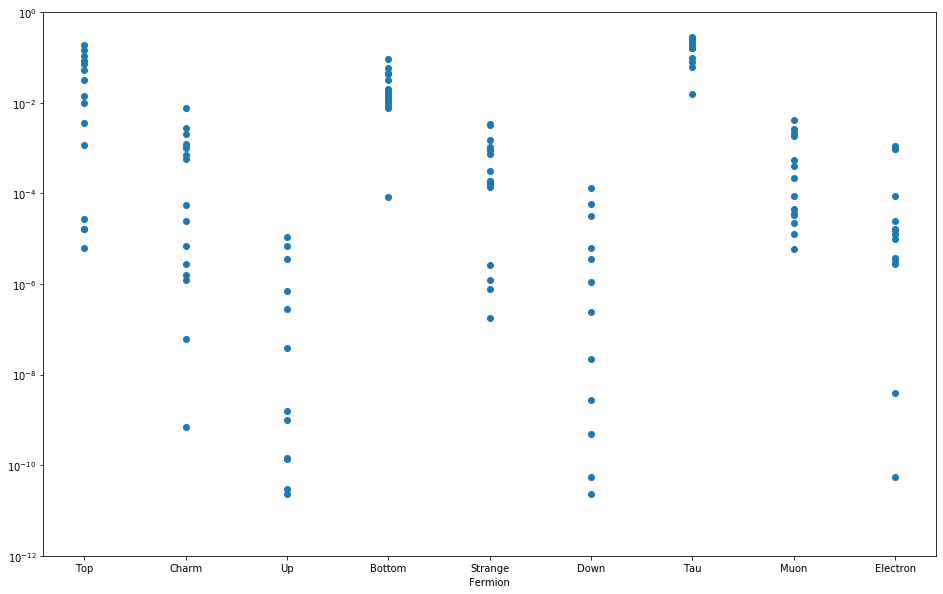

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,10))
plt.scatter(x_ranges,good_sol)
plt.yscale('log')
plt.ylim(10**-12,1)
plt.xlabel("Fermion")  
plt.xticks(np.arange(1,10),["Top","Charm","Up","Bottom","Strange","Down","Tau","Muon","Electron"])

plt.savefig('results_05112020.pdf')

plt.show()

In [ ]:
for filename in glob('*may*best.csv'):
    df = pd.read_csv(filename)
    columns=["y_top","y_charm","y_up","y_bottom","y_strange","y_down","y_tau","y_mu","y_e"]
    plt.figure(figsize=(10,16))
    for col in column:
        plt.plot()
    